In [1]:
import eeg_decoder
import numpy as np
from collections import OrderedDict
%load_ext autoreload
%autoreload 2

In [5]:
experiment_name = '1801'
data_dir = f'../thyer_2021/analysis/data/{experiment_name}'
exp = eeg_decoder.Experiment(experiment_name,data_dir,dev=False)

In [13]:
time_window = 25
time_step = 25
trial_bin_size = 20
n_splits = 5
group_dict = OrderedDict([('Set size 1',[1]),('Set size 2',[2]),('Set size 3',[3]),('Set size 4',[4])])
train_labels = ['Set size 2','Set size 3']
wrangl = eeg_decoder.Wrangler(exp.info['times'],time_window,time_step,trial_bin_size,n_splits,group_dict,train_labels=train_labels)
clfr = eeg_decoder.Classification(wrangl,exp.nsub)

In [14]:
for isub in range(exp.nsub):

    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    xdata,ydata = wrangl.group_labels(xdata,ydata)

    for X_train_all, X_test_all, y_train, y_test in wrangl.bin_and_split_data(xdata,ydata):

        X_train_all, y_train = wrangl.select_training_data(X_train_all, y_train) 
        X_train_all, X_test_all, y_train, y_test = wrangl.balance_data(X_train_all, X_test_all, y_train, y_test)
        y_test_shuffle = np.random.permutation(y_test)

        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):

            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


In [18]:
interp = eeg_decoder.Interpreter(clfr, subtitle='2vs3_with_1and4')
# interp.save_results()

When plotting the confusion matrix, we can see that set size 1 and 4 are never predicted. That's because they are not in the training set. We can see how set size 2 and 3 trials are predicted. This is just a showcase, so I wouldn't really read into these results much though.

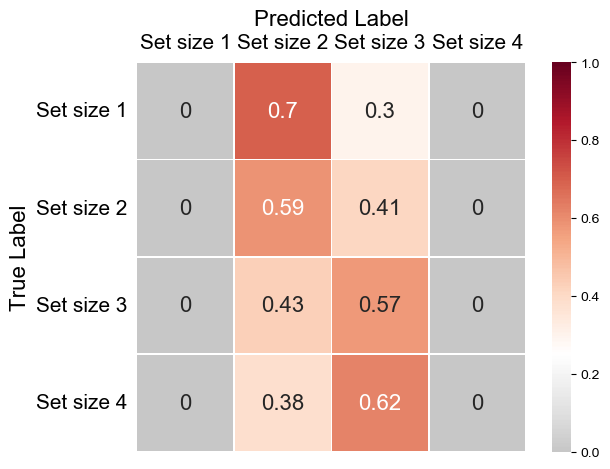

In [19]:
interp.plot_confusion_matrix()

When plotting the hyperplane, we can see how each condition is predicted across time. 

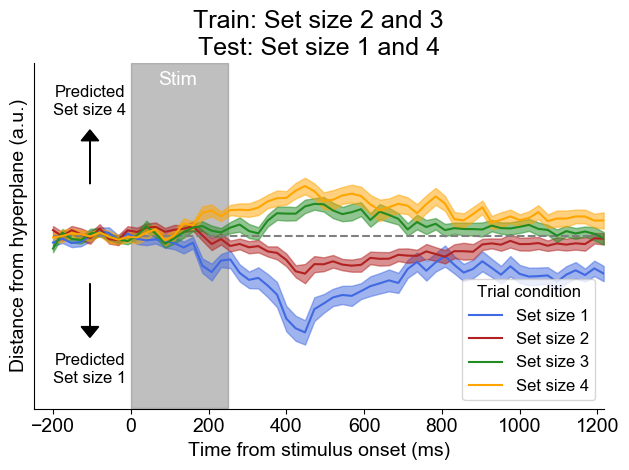

In [20]:
interp.plot_hyperplane(title='Train: Set size 2 and 3\nTest: Set size 1 and 4', ylim=[-3,3])